<a href="https://colab.research.google.com/github/Jayesh-Panchal/Unsupervised-ML---Topic-Modelling-on-News-Articles/blob/main/Copy_of_Topic_Modelling_on_BBC_News_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import required modules
import os
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

In [3]:

# assign directory
directory = '/content/drive/MyDrive/Colab Notebooks/almabetter/Capstone Project/Unsupervised ML - Topic Modelling on News Articles - Jayesh Panchal/Raw Data/bbc'
subdirs = ['business','entertainment','politics','sport','tech']

#create dataframe to add data
bbc = pd.DataFrame()
 
# iterate over files and add them to dataframe
for subdir in subdirs:
  dir = directory+'/'+subdir
  for filename in os.listdir(dir):
    filepath = os.path.join(dir, filename)
    try:
      data = open(filepath,'r').read()
      escape=['\n']
      for elem in escape:
        data=data.replace(elem,' ')
      dict1 = {'Filename': filename.split('.')[0], 'Contents': data.lower(), 'Category':subdir}
      bbc=bbc.append(dict1,ignore_index=True, verify_integrity=True)
    except:
      pass
     
    

In [4]:
#dropping dupes
bbc=bbc.drop_duplicates(subset=['Contents'], keep='first')

In [5]:
bbc.shape


(2125, 3)

In [6]:
reindexed_data = bbc.reset_index()
reindexed_data = reindexed_data["Contents"]

In [7]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_content = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_content, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_content.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
stpwrd = nltk.corpus.stopwords.words('english')


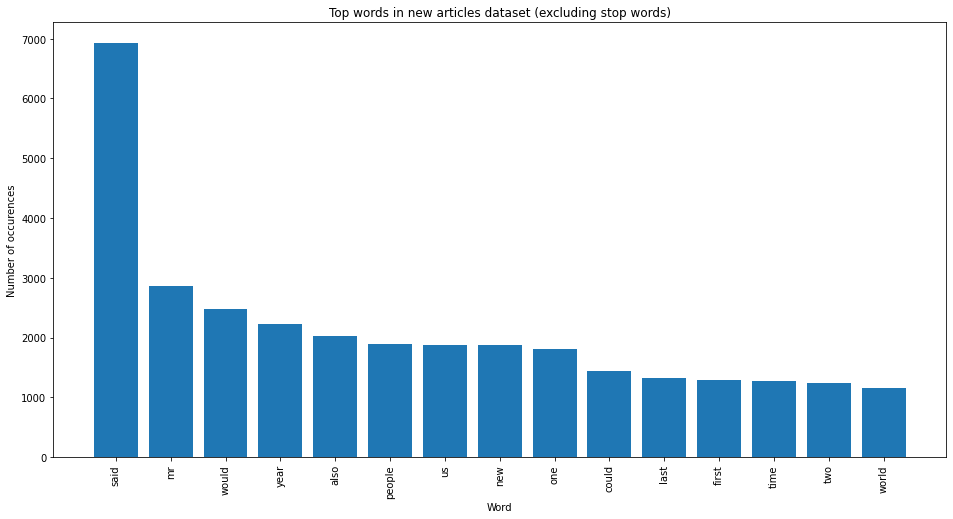

In [10]:
count_vectorizer = CountVectorizer(stop_words=stpwrd)
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in new articles dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

Experiment (Stemming/Lemmatizing the data)

In [11]:
reindexed_data

0       india widens access to telecoms  india has rai...
1       peugeot deal boosts mitsubishi  struggling jap...
2       strong demand triggers oil rally  crude oil pr...
3       us trade gap hits record in 2004  the gap betw...
4       japan narrowly escapes recession  japan's econ...
                              ...                        
2120    hitachi unveils 'fastest robot'  japanese elec...
2121    microsoft plans 'safer id' system  microsoft i...
2122    gizmondo gadget hits the shelves  the gizmondo...
2123    cabs collect mountain of mobiles  gadgets are ...
2124    'podcasters' look to net money  nasa is doing ...
Name: Contents, Length: 2125, dtype: object

In [12]:
from nltk.stem import WordNetLemmatizer
nltk.download(['wordnet','omw-1.4'])
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [13]:

for rows in reindexed_data:
 print(rows)
 test = [lemmatizer.lemmatize(words) for words in rows.split(' ')]
 print(test)
 break

india widens access to telecoms  india has raised the limit for foreign direct investment in telecoms companies from 49% to 74%.  communications minister dayanidhi maran said that there is a need to fund the fast-growing mobile market. the government hopes to increase the number of mobile users from 95 million to between 200 and 250 million by 2007. "we need at least $20bn (£10.6bn) in investment and part of this has to come as foreign direct investment," said mr maran. the decision to raise the limit for foreign investors faced considerable opposition from the communist parties, which give crucial support to the coalition headed by prime minister manmohan singh. potential foreign investors will however need government approval before they increase their stake beyond 49%, mr maran said. key positions, such as those of chief executive, chief technology officer and chief financial officer are to be held by indians, he added.  analysts and investors have welcomed the government decision. 

In [14]:
sno = nltk.stem.SnowballStemmer('english')

In [15]:
for rows in reindexed_data:
 print(rows)
 test = [sno.stem(words) for words in rows.split(' ')]
 print(test)
 break

india widens access to telecoms  india has raised the limit for foreign direct investment in telecoms companies from 49% to 74%.  communications minister dayanidhi maran said that there is a need to fund the fast-growing mobile market. the government hopes to increase the number of mobile users from 95 million to between 200 and 250 million by 2007. "we need at least $20bn (£10.6bn) in investment and part of this has to come as foreign direct investment," said mr maran. the decision to raise the limit for foreign investors faced considerable opposition from the communist parties, which give crucial support to the coalition headed by prime minister manmohan singh. potential foreign investors will however need government approval before they increase their stake beyond 49%, mr maran said. key positions, such as those of chief executive, chief technology officer and chief financial officer are to be held by indians, he added.  analysts and investors have welcomed the government decision. 

In [16]:
from textblob import TextBlob, Word

In [17]:
for rows in reindexed_data:
 print(rows)
 test = [Word(words).lemmatize() for words in rows.split(' ')]
 print(test)
 break

india widens access to telecoms  india has raised the limit for foreign direct investment in telecoms companies from 49% to 74%.  communications minister dayanidhi maran said that there is a need to fund the fast-growing mobile market. the government hopes to increase the number of mobile users from 95 million to between 200 and 250 million by 2007. "we need at least $20bn (£10.6bn) in investment and part of this has to come as foreign direct investment," said mr maran. the decision to raise the limit for foreign investors faced considerable opposition from the communist parties, which give crucial support to the coalition headed by prime minister manmohan singh. potential foreign investors will however need government approval before they increase their stake beyond 49%, mr maran said. key positions, such as those of chief executive, chief technology officer and chief financial officer are to be held by indians, he added.  analysts and investors have welcomed the government decision. 

end

In [18]:
count_vectorizer = CountVectorizer(stop_words=stpwrd, max_features=4000)
text_sample = reindexed_data

print('Content before vectorization: {}'.format(text_sample[123]))

document_term_matrix = count_vectorizer.fit_transform(text_sample)

print('Content after vectorization: \n{}'.format(document_term_matrix[123]))

Content before vectorization: hariri killing hits beirut shares  shares in solidere, the lebanese company founded by assassinated former prime minister rafik hariri, fell 15% in renewed trading in beirut.  the real estate firm, which dominates lebanon's stock exchange, ended the day down at $8.08. traders said there was some panic selling during friday's session, the first since a three-day market closure to mourn the death of mr hariri. beirut's benchmark blom stock index closed down 7.9% at 642.80.  solidere, in which mr hariri was a major shareholder, was the major drag on the index. the company owns much of the property in central beirut, which it restored and redeveloped following the end of lebanon's bitter 15-year civil war. "solidere should be above $10 but because of this disaster it is falling," said one trader. "if solidere drops much lower i would consider it a buying opportunity. this is a very big company held by many lebanese." critics had accused mr hariri of using leba

In [19]:
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV
grid_params = {'n_components' : [5]}

# LDA model
lda = LatentDirichletAllocation()
lda_model = GridSearchCV(lda, param_grid = grid_params)
lda_model.fit(document_term_matrix)

# Best LDA model
best_lda_model = lda_model.best_estimator_

print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(document_term_matrix))

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -643918.9144164848
LDA model Perplexity on train data 1588.6862763634404


In [20]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=c99226b7fb437ab19bf9776a61ea5eb1c64ba9121a712cfb375b36b9354ec5f7
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [21]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [22]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, document_term_matrix,count_vectorizer,mds='tsne')
lda_panel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      150.222153  -72.269554       1        1  21.857547
2       51.163364 -159.968018       2        1  21.821604
1      -73.144554   21.523815       3        1  21.482558
0      -66.410133 -110.606438       4        1  18.644200
4       54.417324   12.443444       5        1  16.194090, topic_info=            Term         Freq        Total Category  logprob  loglift
2377          mr  2869.000000  2869.000000  Default  30.0000  30.0000
1453        film   810.000000   810.000000  Default  29.0000  29.0000
2049      labour   780.000000   780.000000  Default  28.0000  28.0000
482         best   904.000000   904.000000  Default  27.0000  27.0000
1640  government  1140.000000  1140.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
920        could   228.001484  1432.511656   Topic5  -5.6030  -0.0173
3986        year   237.220241  2184.493610   Topic5  -5.5634  -0.3996
2424         new   232.015810  1857.142135   Topic5  -5.5856  -0.2595
251         also   230.530612  2011.391144   Topic5  -5.5920  -0.3457
3639       three   201.469537   783.939052   Topic5  -5.7268   0.4618

[392 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.423547      000
0         2  0.197744      000
0         3  0.233819      000
0         4  0.121586      000
0         5  0.022714      000
...     ...       ...      ...
3987      5  0.127819    years
3995      5  0.983616  yugansk
3997      5  0.995191    yukos
3998      4  0.039673  zealand
3998      5  0.952150  zealand

[785 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1, 5])

In [23]:
#creating docterms df
docterms = lda_panel.token_table.sort_values(by=['Freq'],ascending=False)


In [24]:
docterms

,Topic,Freq,Term
term,,,
3324,3,0.998024,software
2334,3,0.997949,mobile
2535,4,0.997702,oscar
2175,2,0.997510,lords
572,3,0.997457,broadband
...,...,...,...
1640,3,0.002631,government
583,1,0.002246,brown
3735,2,0.002048,tv


In [25]:
#Creating Dataframe to contain top 50 terms by topic
topicsdf=pd.DataFrame()

In [26]:
for i in range(1,6):
  Topicdict ={ "Topic":i, "Terms":list(docterms[docterms['Topic']==i]['Term'].head(50))  }
  topicsdf=topicsdf.append(Topicdict,ignore_index=True)


Topic 1 wordcloud

In [27]:
#creating term freq dict for t1
t1dict = {}
for vals in docterms[docterms['Topic']==1].head(40).values:
  t1dict[vals[2]] =vals[1]
  

In [28]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='beige',
                min_font_size = 10).generate(' '.join(list(t1dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t1dict)


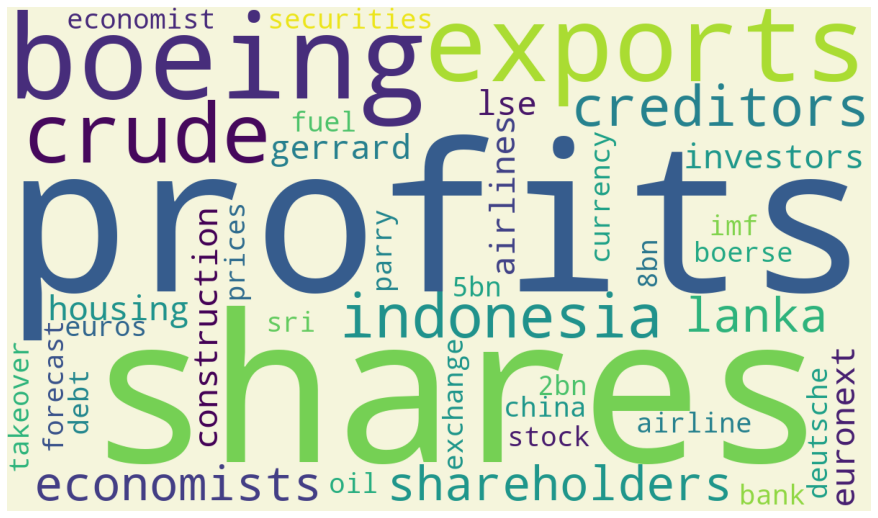

In [29]:
# plot the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Topic 2 wordcloud



In [30]:
#creating term freq dict for t2
t2dict = {}
for vals in docterms[docterms['Topic']==2].head(40).values:
  t2dict[vals[2]] =vals[1]
  

In [31]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='black',
                min_font_size = 10).generate(' '.join(list(t2dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t2dict)


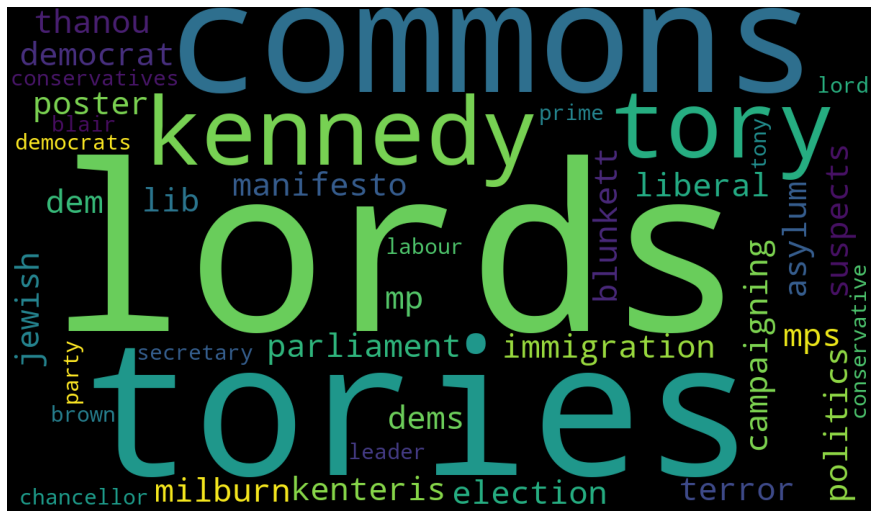

In [32]:
# plot the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Topic 3 Wordcloud

In [33]:
#creating term freq dict for t3
t3dict = {}
for vals in docterms[docterms['Topic']==3].head(40).values:
  t3dict[vals[2]] =vals[1]
  

In [34]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='magenta',
                min_font_size = 10).generate(' '.join(list(t3dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t3dict)


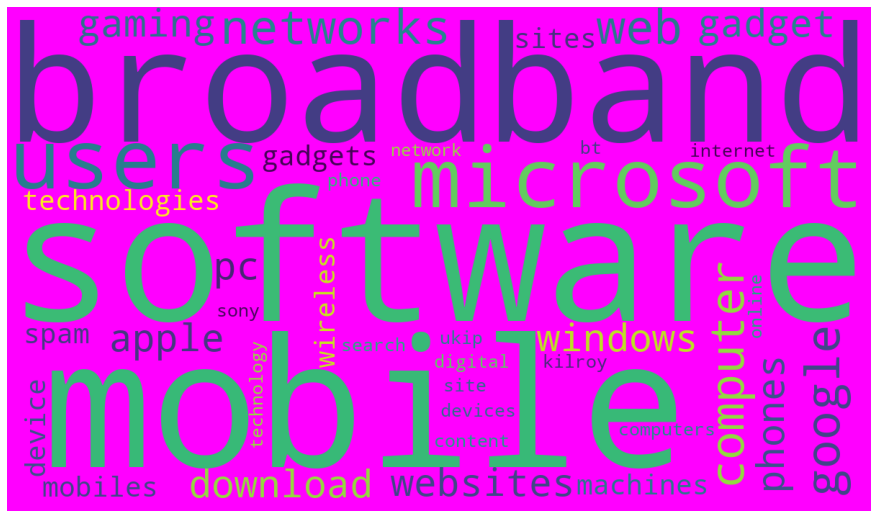

In [35]:
# plot the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Topic 4 wordcloud

In [36]:
#creating term freq dict for t4
t4dict = {}
for vals in docterms[docterms['Topic']==4].head(40).values:
  t4dict[vals[2]] =vals[1]
  

In [37]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='cyan',
                min_font_size = 10).generate(' '.join(list(t4dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t4dict)


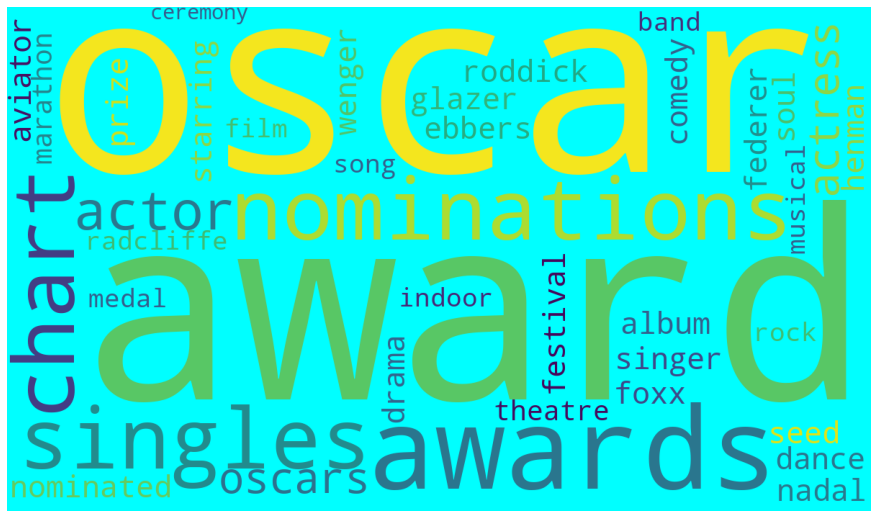

In [38]:
# plot the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

topic 5 wordcloud

In [39]:
#creating term freq dict for t3
t5dict = {}
for vals in docterms[docterms['Topic']==5].head(40).values:
  t5dict[vals[2]] =vals[1]
  

In [40]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='maroon',
                min_font_size = 10).generate(' '.join(list(t5dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t5dict)


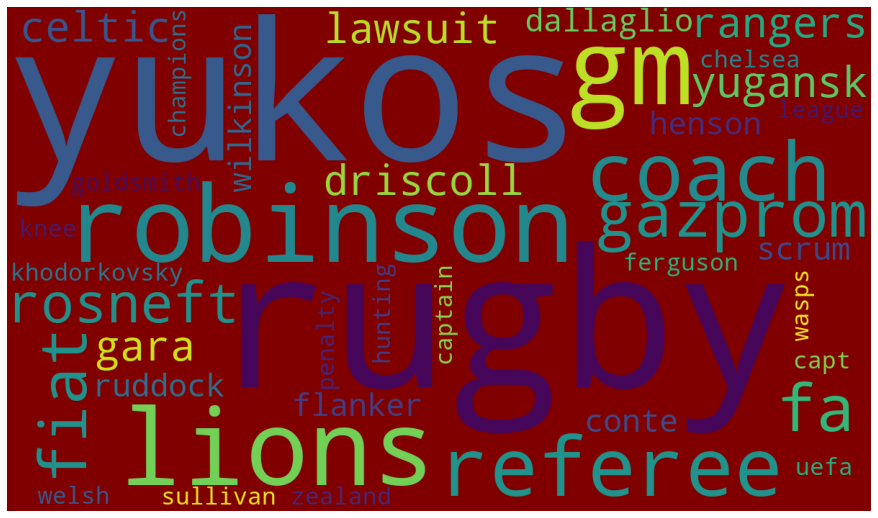

In [41]:
# plot the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Conclusions (intuitive) (Keshav, Sahil, Jayesh kindly simplify anything which seems complex)

1. While reading the text files, we noticed that the file encoding was different in a few off-cases. We found that considering such factors, and engineering based on such knowledge, is very important while handling such data, in order to do so efficiently.

2. Upon experimenting with stemming and lemmatization on our dataset, we found that although it saves space and perhaps time, in our case, it's better to focus on quality, and avoid nuances. In our own 'cost-benefit' analysis, the difference weren't all that significant. Perhaps at a massive scale, the former approach would be ideal.

3. We noticed that it's more optimal to tokenize with no factual differences. 
so we lowercased the contents to unify tokens that may have just case-differences.

4. These are the optimal lda metrics that we got after implementing GridSearchCV: 

  Best LDA model's params {'n_components': 5}

  Best log likelihood Score for the LDA model -643494.9704171557

  LDA model Perplexity on train data 1696.6352006244963

5. Upon looking at the top n topics generated, we were able to correlate it with relevance to what was expected at a significant degree, whilst also shedding light on some unseen aspects.. Hence, we see that the model effectively beared fruit. 